## Group by:
A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups. Parameters: bymapping, function, label, pd.Grouper or list of such. Used to determine the groups for the groupby.

Import and Read File

In [1]:
import pandas as pd   #import pandas
import matplotlib.pyplot as plt 
bike = pd.read_csv("bikeshare/day.csv")  #read file

### For Registered and Casual Data

In [5]:
week_groups= bike.groupby("weekday")
week_groups   #shows result in an object format

In [7]:
# week_groups.groups   #answer= data in form of dictionary

In [10]:
week_groups.groups.keys()
#Notes: As there are six weekdays in week-group so groups method, give keys from 1 to 6 in form of dictionary.

dict_keys([0, 1, 2, 3, 4, 5, 6])

In [11]:
week_groups.get_group(5)   #extract data for which value of weekday= 5

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
13,14,2011-01-14,1,0,1,0,5,1,1,0.160870,0.188413,0.537826,0.126548,54,1367,1421
20,21,2011-01-21,1,0,1,0,5,1,1,0.177500,0.157833,0.457083,0.353242,75,1468,1543
27,28,2011-01-28,1,0,1,0,5,1,2,0.203478,0.223317,0.793043,0.123300,38,1129,1167
34,35,2011-02-04,1,0,2,0,5,1,2,0.211304,0.228587,0.585217,0.127839,88,1620,1708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,700,2012-11-30,4,1,11,0,5,1,1,0.298333,0.323867,0.649583,0.058471,362,5306,5668
706,707,2012-12-07,4,1,12,0,5,1,2,0.320833,0.321958,0.764167,0.130600,349,4659,5008
713,714,2012-12-14,4,1,12,0,5,1,1,0.281667,0.294192,0.642917,0.131229,429,5182,5611
720,721,2012-12-21,1,1,12,0,5,1,2,0.326667,0.301767,0.556667,0.374383,221,3402,3623


#### Mean Data of Registered and Casual Users for all weekdays

In [12]:
week = week_groups[["registered", "casual"]].mean()
week

,registered,casual
weekday,,
0,2890.533333,1338.295238
1,3663.990476,674.133333
2,3954.480769,556.182692
3,3997.394231,551.144231
4,4076.298077,590.961538
5,3938.000000,752.288462
6,3085.285714,1465.257143


---

### Bar Plot for Series data Using Pandas

#### Bar Plot for Registered users in weekdays

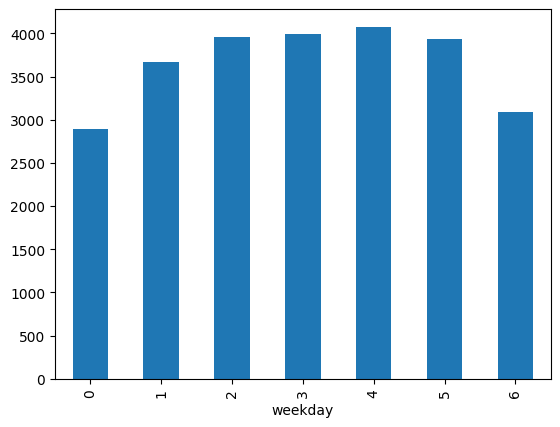

In [13]:
week["registered"].plot.bar()
plt.show()

#### Horizontal Bar Plot for Registered users in weekdays

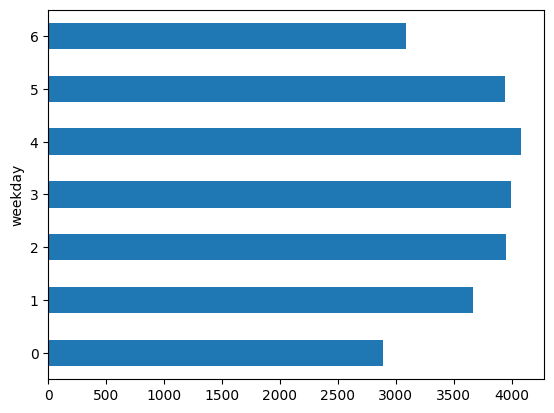

In [14]:
week["registered"].plot.barh()
plt.show()

#### Horizontal Bar Plot for Casual users in weekdays

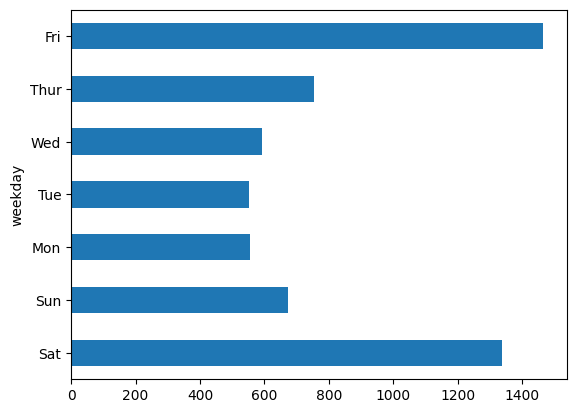

In [20]:
week["casual"].plot.barh()
plt.yticks(ticks=[0,1,2,3,4,5,6], labels=["Sat","Sun", "Mon", "Tue", "Wed", "Thur", "Fri"])  #replacing numbers with days
plt.show()

---

### For Weather Situation Data

In [21]:
bike.weathersit.unique()
#Note: There are 4 situation in the information data. But the output shows only three values means fourth siatution doesnot
# exist in data.

array([2, 1, 3], dtype=int64)

In [22]:
bike.weathersit.value_counts() #tells how many times each weather situation exist in dat

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

#### Pie Chart for weather situation data

<Axes: ylabel='proportion'>

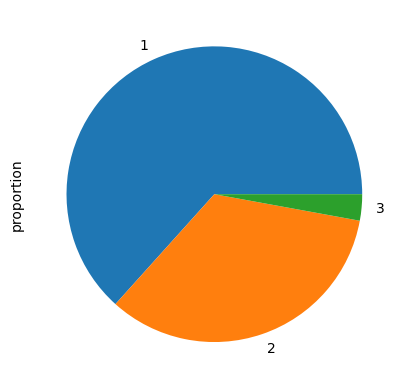

In [23]:
(bike.weathersit.value_counts(normalize = True)*100).plot.pie()

#### Bar Plot for weather situation data

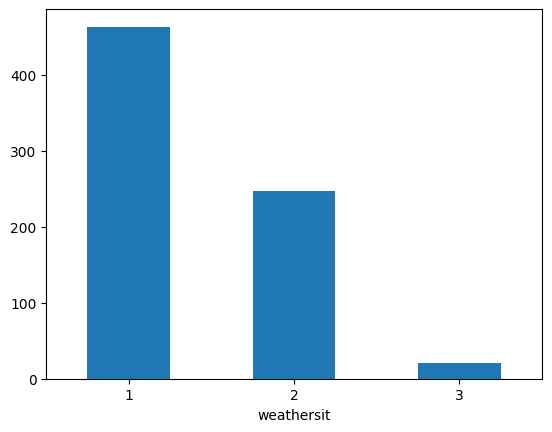

In [25]:
bike.weathersit.value_counts().plot.bar()
plt.xticks(rotation=0)
plt.show()

---

### Some methods on main bike file data

In [30]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [31]:
bike.yr    #gives all the data of year 
#Note: According to given information 0=2011 and 1=2012

0      0
1      0
2      0
3      0
4      0
      ..
726    1
727    1
728    1
729    1
730    1
Name: yr, Length: 731, dtype: int64

---

Note: According to given information 0=2011 and 1=2012

Replacing 0 with 2011 and 1 with 2012 in the given data file. There are two methods to replcae the data in file => map method or replace method

In [46]:
# bike.yr.map({0:2011, 1:2012})    #method 1

bike.yr.replace({0:2011,1:2012}, inplace = True)  #method 2
bike.yr 

0      2011
1      2011
2      2011
3      2011
4      2011
       ... 
726    2012
727    2012
728    2012
729    2012
730    2012
Name: yr, Length: 731, dtype: int64

#### Extract weather situation data for each year individually

In [48]:
bifur_yr = bike.groupby("yr")["weathersit"].value_counts()  
#here yr=0 and 1 (means 2011 and 2012) and weathersit= (four conditions)
bifur_yr

yr    weathersit
2011  1             226
      2             124
      3              15
2012  1             237
      2             123
      3               6
Name: count, dtype: int64

#### To extract value of year 2011

In [50]:
yr_2011 = bifur_yr[2011]
yr_2011

weathersit
1    226
2    124
3     15
Name: count, dtype: int64

#### To extract value of year 2011

In [51]:
yr_2012 = bifur_yr[2012]
yr_2012

weathersit
1    237
2    123
3      6
Name: count, dtype: int64

### Individual Plot bar for both 2011 and 20112 data

Note: It seems like the realtion of weather situation for both years is almost same.

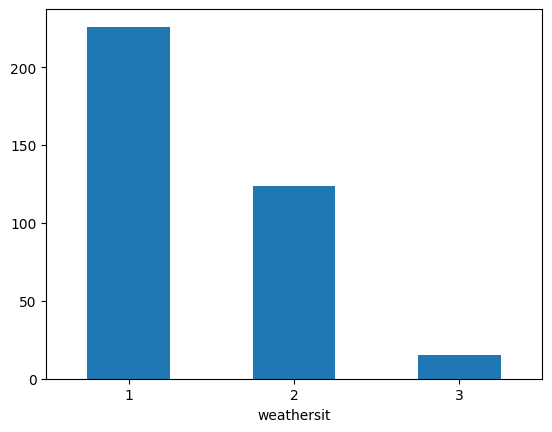

In [53]:
yr_2011.plot.bar()
plt.xticks(rotation=0)
plt.show()

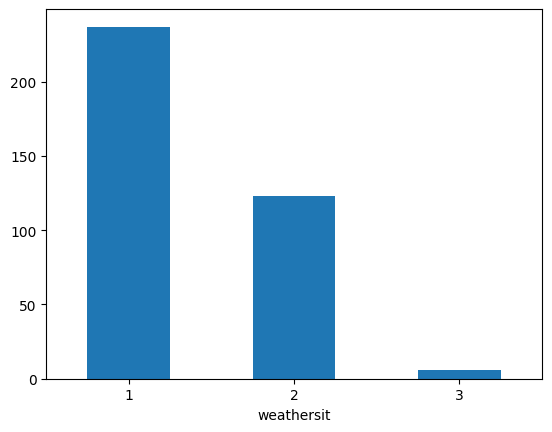

In [54]:
yr_2012.plot.bar()
plt.xticks(rotation=0)
plt.show()